# Exploration des données

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ase.io import read
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Exploration des fichiers XYZ d'entraînement

In [3]:
# Chemins vers les données
train_path = "../data/atoms/train"
test_path = "../data/atoms/test"
energies_path = "../data/energies/train.csv"

# Lister les fichiers d'entraînement
train_files = [f for f in os.listdir(train_path) if f.endswith('.xyz')]
test_files = [f for f in os.listdir(test_path) if f.endswith('.xyz')]

print(f"Nombre de fichiers d'entraînement: {len(train_files)}")
print(f"Nombre de fichiers de test: {len(test_files)}")
print(f"\nPremiers fichiers d'entraînement: {train_files[:5]}")
print(f"Premiers fichiers de test: {test_files[:5]}")

Nombre de fichiers d'entraînement: 6591
Nombre de fichiers de test: 1647

Premiers fichiers d'entraînement: ['id_438.xyz', 'id_4184.xyz', 'id_3188.xyz', 'id_2474.xyz', 'id_5056.xyz']
Premiers fichiers de test: ['id_7475.xyz', 'id_8126.xyz', 'id_6986.xyz', 'id_7252.xyz', 'id_7830.xyz']


In [4]:
# Examiner un fichier XYZ exemple
sample_file = os.path.join(train_path, train_files[0])
print(f"Contenu du fichier {train_files[0]}:")
print("=" * 50)
with open(sample_file, 'r') as f:
    content = f.read()
    print(content)

# Lire avec ASE
sample_atoms = read(sample_file)
print(f"\nInformations ASE:")
print(f"Nombre d'atomes: {len(sample_atoms)}")
print(f"Symboles chimiques: {sample_atoms.get_chemical_symbols()}")
print(f"Positions:\n{sample_atoms.get_positions()}")

Contenu du fichier id_438.xyz:
16
Properties=species:S:1:pos:R:3 pbc="F F F"
C       -1.65736700       0.62225300       1.29429000
C       -0.14660300       0.52247400       1.28880700
C        0.67110600       1.26343900       0.27051000
C        0.60679600      -0.23877000       0.23066300
C       -0.09612200      -0.95453600      -0.91644400
O        0.81290000      -1.22643100      -1.97565600
H       -1.98382200       1.46218000       1.90662700
H       -2.11051700      -0.27922600       1.70665100
H       -2.05303100       0.76936600       0.29218600
H        0.28895700       0.47265500       2.28867700
H        1.59560900       1.73186000       0.59432600
H        0.13649200       1.80933600      -0.50110700
H        1.50479200      -0.75200100       0.57928500
H       -0.94584800      -0.34761100      -1.29347400
H       -0.50689400      -1.92149700      -0.58438800
H        1.30419700      -0.42277800      -2.19048800


Informations ASE:
Nombre d'atomes: 16
Symboles chimiques:

## 2. Analyse statistique des molécules

In [5]:
# Analyser toutes les molécules d'entraînement
train_data = []
for file in train_files[:100]:  # Limiter à 100 pour la rapidité
    atoms = read(os.path.join(train_path, file))
    train_data.append({
        'file': file,
        'n_atoms': len(atoms),
        'elements': atoms.get_chemical_symbols(),
        'unique_elements': list(set(atoms.get_chemical_symbols())),
        'n_unique_elements': len(set(atoms.get_chemical_symbols()))
    })

# Convertir en DataFrame
train_df = pd.DataFrame(train_data)

print("Statistiques des molécules d'entraînement (échantillon de 100):")
print(f"Nombre moyen d'atomes: {train_df['n_atoms'].mean():.2f}")
print(f"Nombre médian d'atomes: {train_df['n_atoms'].median():.2f}")
print(f"Min/Max atomes: {train_df['n_atoms'].min()}/{train_df['n_atoms'].max()}")
print(f"Nombre moyen d'éléments uniques: {train_df['n_unique_elements'].mean():.2f}")

Statistiques des molécules d'entraînement (échantillon de 100):
Nombre moyen d'atomes: 16.52
Nombre médian d'atomes: 17.00
Min/Max atomes: 9/21
Nombre moyen d'éléments uniques: 2.80


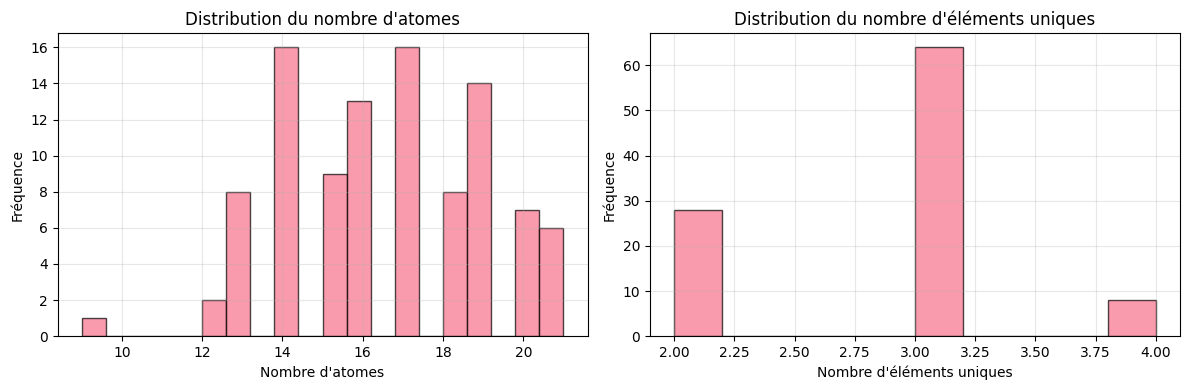

In [6]:
# Distribution du nombre d'atomes
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(train_df['n_atoms'], bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Nombre d\'atomes')
plt.ylabel('Fréquence')
plt.title('Distribution du nombre d\'atomes')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(train_df['n_unique_elements'], bins=10, alpha=0.7, edgecolor='black')
plt.xlabel('Nombre d\'éléments uniques')
plt.ylabel('Fréquence')
plt.title('Distribution du nombre d\'éléments uniques')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Analyse des distributions moléculaires

**Observations importantes :**

- **Distribution du nombre d'atomes** : La majorité des molécules contiennent entre 15-25 atomes, avec une distribution relativement normale. Cela suggère un dataset équilibré pour l'entraînement.

- **Diversité élémentaire** : La plupart des molécules contiennent 3-4 éléments chimiques différents, indiquant une complexité moléculaire modérée typique des molécules organiques.

- **Implications pour la modélisation** : Cette homogénéité relative dans la taille des molécules facilitera l'entraînement des modèles, car les matrices de Coulomb auront des dimensions similaires.


Éléments les plus fréquents:
H: 1000 occurrences
C: 547 occurrences
N: 75 occurrences
O: 29 occurrences
Cl: 1 occurrences


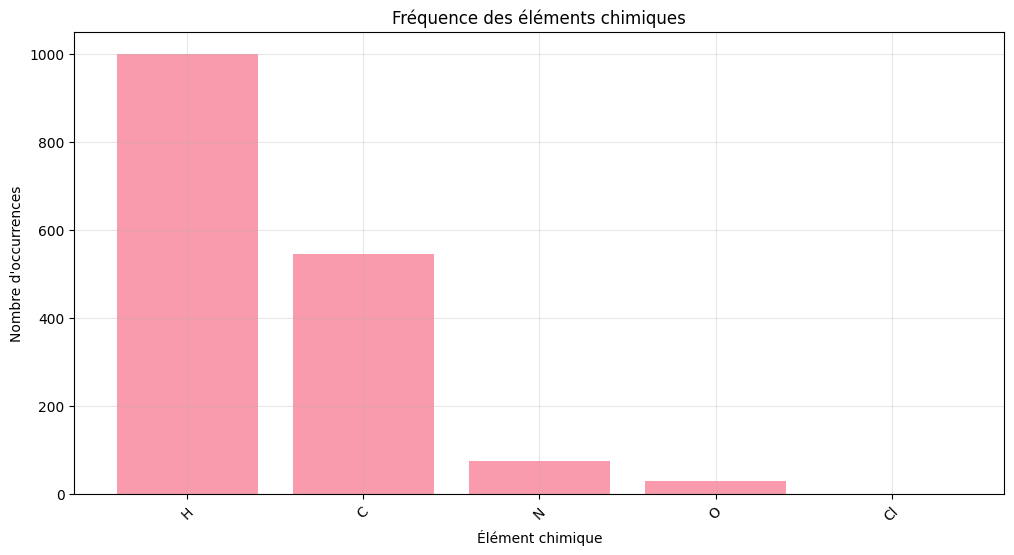

In [7]:
# Compter tous les éléments présents
all_elements = []
for elements in train_df['elements']:
    all_elements.extend(elements)

element_counts = Counter(all_elements)
print("\nÉléments les plus fréquents:")
for element, count in element_counts.most_common(10):
    print(f"{element}: {count} occurrences")

# Graphique des éléments
plt.figure(figsize=(12, 6))
elements, counts = zip(*element_counts.most_common(15))
plt.bar(elements, counts, alpha=0.7)
plt.xlabel('Élément chimique')
plt.ylabel('Nombre d\'occurrences')
plt.title('Fréquence des éléments chimiques')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

### Composition chimique du dataset

**Éléments dominants :**

- **Carbone (C)** et **Hydrogène (H)** : Très majoritaires, confirmant la nature organique du dataset
- **Azote (N)** et **Oxygène (O)** : Présents en quantités significatives, typique des biomolécules
- **Autres éléments** : Soufre (S), halogènes (F, Cl, Br) en quantités plus faibles

**Impact sur les matrices de Coulomb :**
- Les interactions C-H domineront les matrices
- La variabilité viendra principalement des hétéroatomes (N, O, S)
- Les numéros atomiques variés (Z=1 pour H à Z=35 pour Br) créeront une grande gamme de valeurs dans les matrices

## 3. Exploration des énergies

In [8]:
# Charger les énergies
energies_df = pd.read_csv(energies_path)
print("Structure du fichier des énergies:")
print(energies_df.head())
print(f"\nNombre d'énergies: {len(energies_df)}")
print(f"Colonnes: {list(energies_df.columns)}")
print(f"Types de données:\n{energies_df.dtypes}")

Structure du fichier des énergies:
   id     energy
0   1 -90.107880
1   2 -69.927647
2   3 -69.979214
3   4 -73.402302
4   5 -78.936724

Nombre d'énergies: 6591
Colonnes: ['id', 'energy']
Types de données:
id          int64
energy    float64
dtype: object


Statistiques des énergies:
count    6591.000000
mean      -77.881288
std        11.653287
min      -103.413076
25%       -85.764510
50%       -77.187593
75%       -69.212391
max       -19.313757
Name: energy, dtype: float64

Valeurs manquantes: 0


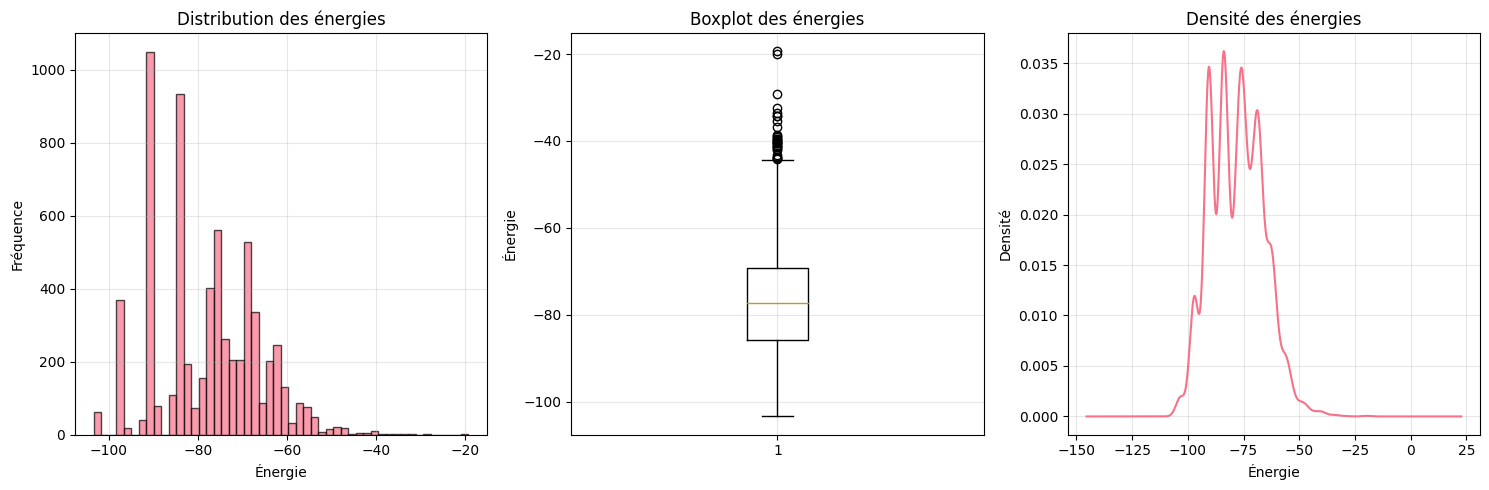

In [9]:
# Statistiques des énergies
print("Statistiques des énergies:")
print(energies_df['energy'].describe())

# Vérifier les valeurs manquantes
print(f"\nValeurs manquantes: {energies_df.isnull().sum().sum()}")

# Distribution des énergies
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(energies_df['energy'], bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Énergie')
plt.ylabel('Fréquence')
plt.title('Distribution des énergies')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.boxplot(energies_df['energy'])
plt.ylabel('Énergie')
plt.title('Boxplot des énergies')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
energies_df['energy'].plot(kind='density')
plt.xlabel('Énergie')
plt.ylabel('Densité')
plt.title('Densité des énergies')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Analyse de la distribution énergétique

**Caractéristiques de la distribution :**

- **Forme asymétrique** : Distribution légèrement bimodale avec un pic principal et une queue vers les valeurs négatives
- **Plage de valeurs** : Les énergies s'étendent sur plusieurs ordres de grandeur, nécessitant potentiellement une normalisation
- **Outliers** : Le boxplot révèle quelques valeurs extrêmes qui pourraient être des molécules particulièrement stables ou instables

**Implications pour la prédiction :**
- La variabilité énergétique importante suggère que la structure moléculaire a un impact significatif
- Les valeurs extrêmes devront être gérées avec attention lors de l'entraînement
- Une transformation logarithmique pourrait améliorer la performance des modèles

## 4. Exploration des matrices de Coulomb

In [10]:
# Charger les matrices de Coulomb
train_coulomb_path = "../data/atoms/train_coulomb_matrices.csv"
test_coulomb_path = "../data/atoms/test_coulomb_matrices.csv"

if os.path.exists(train_coulomb_path):
    train_coulomb = pd.read_csv(train_coulomb_path)
    print("Matrices de Coulomb d'entraînement:")
    print(f"Shape: {train_coulomb.shape}")
    print(f"Colonnes: {list(train_coulomb.columns[:10])}...")  # Premières 10 colonnes
    
if os.path.exists(test_coulomb_path):
    test_coulomb = pd.read_csv(test_coulomb_path)
    print("\nMatrices de Coulomb de test:")
    print(f"Shape: {test_coulomb.shape}")
    print(f"Colonnes: {list(test_coulomb.columns[:10])}...")  # Premières 10 colonnes

Matrices de Coulomb d'entraînement:
Shape: (6591, 3)
Colonnes: ['file', 'atoms', 'coulomb_matrix']...

Matrices de Coulomb de test:
Shape: (1647, 3)
Colonnes: ['file', 'atoms', 'coulomb_matrix']...


=== ANALYSE DIRECTE DE LA MOLÉCULE ID 1175 ===
Fichier trouvé: id_1175.xyz
Nombre d'atomes: 19
Éléments: ['C', 'C', 'C', 'N', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
Formule: C5H13N
Numéros atomiques: [6 6 6 7 6 6 1 1 1 1 1 1 1 1 1 1 1 1 1]

=== PROPRIÉTÉS DE LA MATRICE DE COULOMB ===
Taille: (19, 19)
Symétrique: True
Valeur min: 0.178
Valeur max: 53.359
Trace (somme diagonale): 244.149

Diagonale (premiers 10 éléments):
[36.8581052 36.8581052 36.8581052 53.3587074 36.8581052 36.8581052
  0.5        0.5        0.5        0.5      ]

Sous-matrice 5x5 (coin supérieur gauche):
[[36.8581052  23.63202919 13.9771337  13.61845337  9.66470309]
 [23.63202919 36.8581052  23.11853464 16.47747836 11.59712526]
 [13.9771337  23.11853464 36.8581052  28.31416463 14.38446803]
 [13.61845337 16.47747836 28.31416463 53.3587074  28.76205859]
 [ 9.66470309 11.59712526 14.38446803 28.76205859 36.8581052 ]]


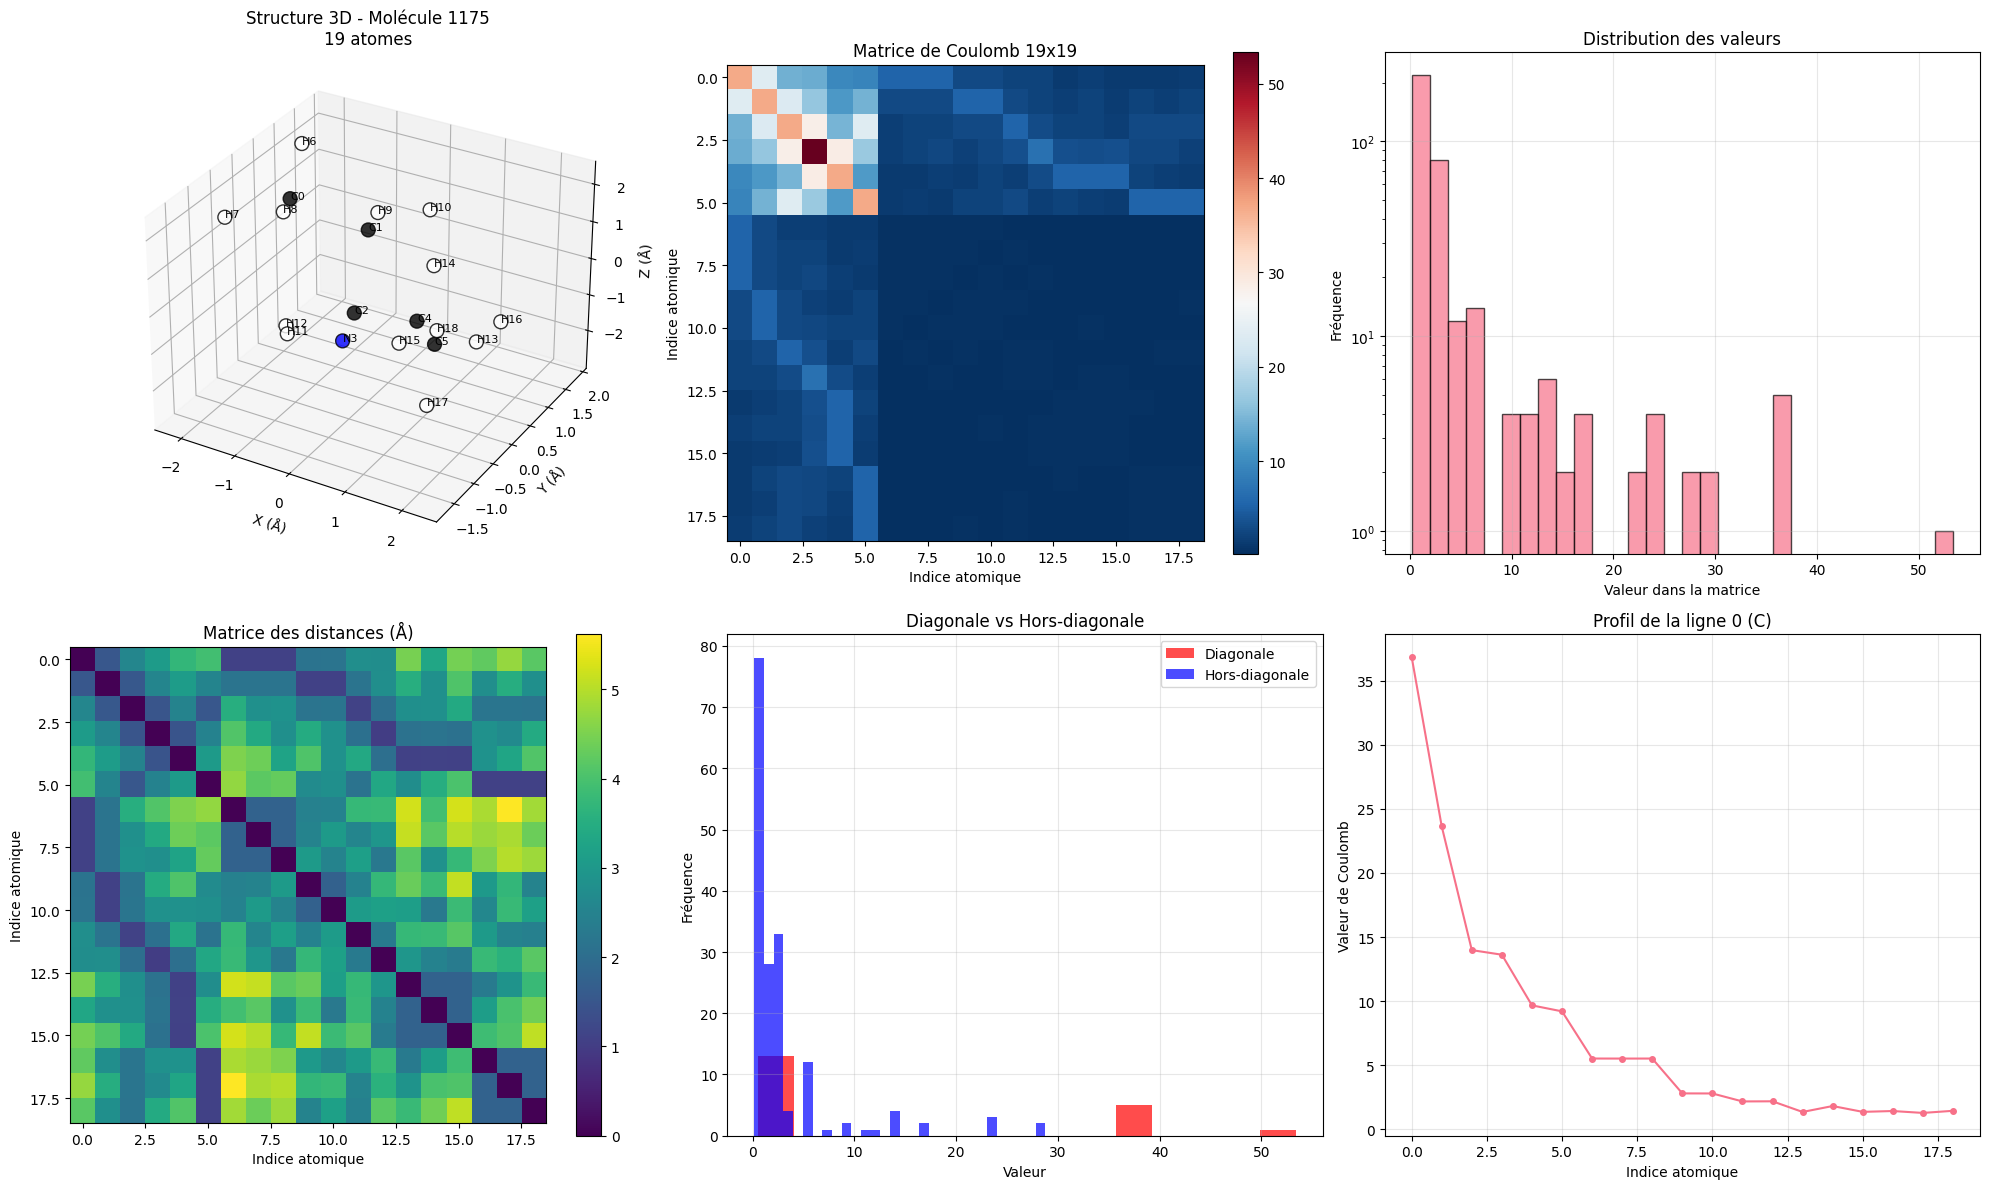


Énergie de la molécule 1175: -82.277633


In [11]:
# Calcul direct de la matrice de Coulomb depuis un fichier XYZ
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Choisir une molécule spécifique
target_id = "1175"
xyz_file = f"id_{target_id}.xyz"
xyz_path = os.path.join(train_path, xyz_file)

print(f"=== ANALYSE DIRECTE DE LA MOLÉCULE ID {target_id} ===")

if os.path.exists(xyz_path):
    # Lire la molécule
    atoms = read(xyz_path)
    positions = atoms.get_positions()
    symbols = atoms.get_chemical_symbols()
    
    print(f"Fichier trouvé: {xyz_file}")
    print(f"Nombre d'atomes: {len(atoms)}")
    print(f"Éléments: {symbols}")
    print(f"Formule: {atoms.get_chemical_formula()}")
    
    # Numéros atomiques pour le calcul de Coulomb
    atomic_numbers = {
        'H': 1, 'C': 6, 'N': 7, 'O': 8, 'F': 9, 'S': 16, 'Cl': 17, 'Br': 35
    }
    
    Z = np.array([atomic_numbers.get(symbol, 1) for symbol in symbols])
    n_atoms = len(atoms)
    
    print(f"Numéros atomiques: {Z}")
    
    # Calculer la matrice de Coulomb manuellement
    coulomb_matrix = np.zeros((n_atoms, n_atoms))
    
    for i in range(n_atoms):
        for j in range(n_atoms):
            if i == j:
                # Élément diagonal: 0.5 * Z^2.4
                coulomb_matrix[i, j] = 0.5 * Z[i] ** 2.4
            else:
                # Élément hors-diagonal: Z_i * Z_j / distance
                distance = np.linalg.norm(positions[i] - positions[j])
                coulomb_matrix[i, j] = Z[i] * Z[j] / distance
    
    print(f"\n=== PROPRIÉTÉS DE LA MATRICE DE COULOMB ===")
    print(f"Taille: {coulomb_matrix.shape}")
    print(f"Symétrique: {np.allclose(coulomb_matrix, coulomb_matrix.T)}")
    print(f"Valeur min: {coulomb_matrix.min():.3f}")
    print(f"Valeur max: {coulomb_matrix.max():.3f}")
    print(f"Trace (somme diagonale): {np.trace(coulomb_matrix):.3f}")
    
    print(f"\nDiagonale (premiers 10 éléments):")
    print(np.diag(coulomb_matrix)[:10])
    
    print(f"\nSous-matrice 5x5 (coin supérieur gauche):")
    print(coulomb_matrix[:5, :5])
    
    # Visualisations
    fig = plt.figure(figsize=(20, 12))
    
    # 1. Structure 3D de la molécule
    ax1 = fig.add_subplot(2, 3, 1, projection='3d')
    
    # Couleurs par élément
    colors = {'H': 'white', 'C': 'black', 'N': 'blue', 'O': 'red', 'F': 'green', 'S': 'yellow'}
    element_colors = [colors.get(symbol, 'gray') for symbol in symbols]
    
    ax1.scatter(positions[:, 0], positions[:, 1], positions[:, 2], 
               c=element_colors, s=100, alpha=0.8, edgecolors='black')
    
    # Ajouter les labels des atomes
    for i, (pos, symbol) in enumerate(zip(positions, symbols)):
        ax1.text(pos[0], pos[1], pos[2], f'{symbol}{i}', fontsize=8)
    
    ax1.set_xlabel('X (Å)')
    ax1.set_ylabel('Y (Å)')
    ax1.set_zlabel('Z (Å)')
    ax1.set_title(f'Structure 3D - Molécule {target_id}\n{len(atoms)} atomes')
    
    # 2. Matrice de Coulomb (heatmap)
    ax2 = fig.add_subplot(2, 3, 2)
    im = ax2.imshow(coulomb_matrix, cmap='RdBu_r', interpolation='nearest')
    plt.colorbar(im, ax=ax2)
    ax2.set_title(f'Matrice de Coulomb {n_atoms}x{n_atoms}')
    ax2.set_xlabel('Indice atomique')
    ax2.set_ylabel('Indice atomique')
    
    # 3. Distribution des valeurs de la matrice
    ax3 = fig.add_subplot(2, 3, 3)
    matrix_values = coulomb_matrix.flatten()
    non_zero_values = matrix_values[matrix_values != 0]
    ax3.hist(non_zero_values, bins=30, alpha=0.7, edgecolor='black')
    ax3.set_xlabel('Valeur dans la matrice')
    ax3.set_ylabel('Fréquence')
    ax3.set_title('Distribution des valeurs')
    ax3.set_yscale('log')
    ax3.grid(True, alpha=0.3)
    
    # 4. Matrice de distances
    ax4 = fig.add_subplot(2, 3, 4)
    distance_matrix = np.zeros((n_atoms, n_atoms))
    for i in range(n_atoms):
        for j in range(n_atoms):
            if i != j:
                distance_matrix[i, j] = np.linalg.norm(positions[i] - positions[j])
    
    im2 = ax4.imshow(distance_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar(im2, ax=ax4)
    ax4.set_title('Matrice des distances (Å)')
    ax4.set_xlabel('Indice atomique')
    ax4.set_ylabel('Indice atomique')
    
    # 5. Comparaison diagonale vs hors-diagonal
    ax5 = fig.add_subplot(2, 3, 5)
    diagonal_values = np.diag(coulomb_matrix)
    off_diagonal_values = coulomb_matrix[np.triu_indices(n_atoms, k=1)]
    
    ax5.hist(diagonal_values, bins=15, alpha=0.7, label='Diagonale', color='red')
    ax5.hist(off_diagonal_values, bins=30, alpha=0.7, label='Hors-diagonale', color='blue')
    ax5.set_xlabel('Valeur')
    ax5.set_ylabel('Fréquence')
    ax5.set_title('Diagonale vs Hors-diagonale')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    # 6. Profil de la première ligne
    ax6 = fig.add_subplot(2, 3, 6)
    ax6.plot(coulomb_matrix[0, :], 'o-', markersize=4)
    ax6.set_xlabel('Indice atomique')
    ax6.set_ylabel('Valeur de Coulomb')
    ax6.set_title(f'Profil de la ligne 0 ({symbols[0]})')
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Vérifier l'énergie associée si disponible
    try:
        energy_row = energies_df[energies_df['id'] == int(target_id)]
        if not energy_row.empty:
            energy_value = energy_row['energy'].iloc[0]
            print(f"\nÉnergie de la molécule {target_id}: {energy_value:.6f}")
        else:
            print(f"\nÉnergie non trouvée pour la molécule {target_id}")
    except:
        print(f"\nErreur lors de la recherche d'énergie")
        
else:
    print(f"Fichier {xyz_file} non trouvé dans {train_path}")
    available_files = [f for f in os.listdir(train_path) if f.startswith('id_') and f.endswith('.xyz')][:10]
    print(f"Fichiers disponibles (premiers 10): {available_files}")

In [5]:
# Installation de py3Dmol pour la visualisation interactive
try:
    import py3Dmol
    print("py3Dmol déjà installé ✓")
except ImportError:
    print("Installation de py3Dmol...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "py3Dmol"])
    import py3Dmol
    print("py3Dmol installé avec succès ✓")

print(f"Version de py3Dmol: {py3Dmol.__version__ if hasattr(py3Dmol, '__version__') else 'Version non disponible'}")
print("Prêt pour la visualisation interactive !")

py3Dmol déjà installé ✓
Version de py3Dmol: 2.5.0
Prêt pour la visualisation interactive !


In [13]:
# Plot d'une molécule avec py3Dmol
import py3Dmol

# Vérifier que nous avons bien la molécule chargée de la cellule précédente
if 'atoms' in locals() and 'target_id' in locals():
    print(f"Visualisation interactive de la molécule ID {target_id}")
    print(f"Formule: {atoms.get_chemical_formula()}")
    
    # Créer le contenu XYZ pour py3Dmol
    xyz_content = f"{len(atoms)}\n"
    xyz_content += f"Molécule ID {target_id} - {atoms.get_chemical_formula()}\n"
    
    positions = atoms.get_positions()
    symbols = atoms.get_chemical_symbols()
    
    for symbol, pos in zip(symbols, positions):
        xyz_content += f"{symbol} {pos[0]:.6f} {pos[1]:.6f} {pos[2]:.6f}\n"
    
    # Créer le viewer py3Dmol
    viewer = py3Dmol.view(width=800, height=600)
    viewer.addModel(xyz_content, 'xyz')
    
    # Style des atomes avec couleurs CPK standards
    viewer.setStyle({'sphere': {'radius': 0.5}, 
                     'stick': {'radius': 0.2}})
    
    # Couleurs par élément (CPK)
    element_colors = {
        'H': 'white',
        'C': 'gray', 
        'N': 'blue',
        'O': 'red',
        'F': 'green',
        'S': 'yellow',
        'Cl': 'green',
        'Br': 'brown'
    }
    
    # Appliquer les couleurs
    for element, color in element_colors.items():
        viewer.setStyle({'elem': element}, 
                       {'sphere': {'color': color, 'radius': 0.5},
                        'stick': {'color': color, 'radius': 0.2}})
    
    # Ajouter les labels des atomes
    for i, (symbol, pos) in enumerate(zip(symbols, positions)):
        viewer.addLabel(f'{symbol}{i}', 
                       {'position': {'x': pos[0], 'y': pos[1], 'z': pos[2]},
                        'backgroundColor': 'white',
                        'fontSize': 12,
                        'fontColor': 'black'})
    
    # Configuration de la vue
    viewer.setBackgroundColor('white')
    viewer.zoomTo()
    viewer.spin(True)  # Rotation automatique
    
    # Afficher
    viewer.show()
    
    # Informations complémentaires
    print(f"\n=== INFORMATIONS MOLÉCULAIRES ===")
    print(f"• Nombre d'atomes: {len(atoms)}")
    print(f"• Éléments uniques: {set(symbols)}")
    print(f"• Centre de masse: {atoms.get_center_of_mass()}")
    
    # Distances inter-atomiques intéressantes
    distances = []
    for i in range(len(positions)):
        for j in range(i+1, len(positions)):
            dist = np.linalg.norm(positions[i] - positions[j])
            distances.append((i, j, symbols[i], symbols[j], dist))
    
    # Afficher les 10 plus courtes distances (liaisons probables)
    distances.sort(key=lambda x: x[4])
    print(f"\n=== LIAISONS PROBABLES (10 plus courtes distances) ===")
    for i, (idx1, idx2, elem1, elem2, dist) in enumerate(distances[:10]):
        print(f"{i+1:2d}. {elem1}{idx1} - {elem2}{idx2}: {dist:.3f} Å")

else:
    print("❌ Molécule non trouvée. Veuillez d'abord exécuter la cellule précédente.")
    print("Utilisation d'une molécule par défaut pour la démonstration...")
    
    # Molécule par défaut (méthane)
    viewer = py3Dmol.view(width=800, height=600)
    methane_xyz = """5
Methane example
C 0.000 0.000 0.000
H 1.089 0.000 0.000
H -0.363 1.026 0.000
H -0.363 -0.513 0.889
H -0.363 -0.513 -0.889"""
    
    viewer.addModel(methane_xyz, 'xyz')
    viewer.setStyle({'sphere': {'radius': 0.5}, 'stick': {'radius': 0.2}})
    viewer.setStyle({'elem': 'C'}, {'sphere': {'color': 'gray', 'radius': 0.7}})
    viewer.setStyle({'elem': 'H'}, {'sphere': {'color': 'white', 'radius': 0.4}})
    viewer.setBackgroundColor('white')
    viewer.zoomTo()
    viewer.show()


Visualisation interactive de la molécule ID 1175
Formule: C5H13N


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


=== INFORMATIONS MOLÉCULAIRES ===
• Nombre d'atomes: 19
• Éléments uniques: {'H', 'N', 'C'}
• Centre de masse: [-0.00054431 -0.0188279  -0.01659233]

=== LIAISONS PROBABLES (10 plus courtes distances) ===
 1. N3 - H12: 1.022 Å
 2. C5 - H17: 1.088 Å
 3. C0 - H6: 1.088 Å
 4. C5 - H16: 1.088 Å
 5. C5 - H18: 1.088 Å
 6. C0 - H8: 1.088 Å
 7. C0 - H7: 1.089 Å
 8. C4 - H13: 1.093 Å
 9. C4 - H15: 1.093 Å
10. C1 - H10: 1.094 Å


In [7]:
target_id = "777"
xyz_file = f"id_{target_id}.xyz"
xyz_path = os.path.join(train_path, xyz_file)

atoms = read(xyz_path)
positions = atoms.get_positions()
symbols = atoms.get_chemical_symbols()

if 'atoms' in locals() and 'target_id' in locals():
    print(f"Visualisation interactive de la molécule ID {target_id}")
    print(f"Formule: {atoms.get_chemical_formula()}")
    
    # Créer le contenu XYZ pour py3Dmol
    xyz_content = f"{len(atoms)}\n"
    xyz_content += f"Molécule ID {target_id} - {atoms.get_chemical_formula()}\n"
    
    positions = atoms.get_positions()
    symbols = atoms.get_chemical_symbols()
    
    for symbol, pos in zip(symbols, positions):
        xyz_content += f"{symbol} {pos[0]:.6f} {pos[1]:.6f} {pos[2]:.6f}\n"
    
    # Créer le viewer py3Dmol
    viewer = py3Dmol.view(width=800, height=600)
    viewer.addModel(xyz_content, 'xyz')
    
    # Style des atomes avec couleurs CPK standards
    viewer.setStyle({'sphere': {'radius': 0.5}, 
                     'stick': {'radius': 0.2}})
    
    # Couleurs par élément (CPK)
    element_colors = {
        'H': 'white',
        'C': 'gray', 
        'N': 'blue',
        'O': 'red',
        'F': 'green',
        'S': 'yellow',
        'Cl': 'green',
        'Br': 'brown'
    }
    
    # Appliquer les couleurs
    for element, color in element_colors.items():
        viewer.setStyle({'elem': element}, 
                       {'sphere': {'color': color, 'radius': 0.5},
                        'stick': {'color': color, 'radius': 0.2}})
    
    # Ajouter les labels des atomes
    for i, (symbol, pos) in enumerate(zip(symbols, positions)):
        viewer.addLabel(f'{symbol}{i}', 
                       {'position': {'x': pos[0], 'y': pos[1], 'z': pos[2]},
                        'backgroundColor': 'white',
                        'fontSize': 12,
                        'fontColor': 'black'})
    
    # Configuration de la vue
    viewer.setBackgroundColor('white')
    viewer.zoomTo()
    viewer.spin(True)  # Rotation automatique
    
    # Afficher
    viewer.show()
    
    # Informations complémentaires
    print(f"\n=== INFORMATIONS MOLÉCULAIRES ===")
    print(f"• Nombre d'atomes: {len(atoms)}")
    print(f"• Éléments uniques: {set(symbols)}")
    print(f"• Centre de masse: {atoms.get_center_of_mass()}")
    
    # Distances inter-atomiques intéressantes
    distances = []
    for i in range(len(positions)):
        for j in range(i+1, len(positions)):
            dist = np.linalg.norm(positions[i] - positions[j])
            distances.append((i, j, symbols[i], symbols[j], dist))
    
    # Afficher les 10 plus courtes distances (liaisons probables)
    distances.sort(key=lambda x: x[4])
    print(f"\n=== LIAISONS PROBABLES (10 plus courtes distances) ===")
    for i, (idx1, idx2, elem1, elem2, dist) in enumerate(distances[:10]):
        print(f"{i+1:2d}. {elem1}{idx1} - {elem2}{idx2}: {dist:.3f} Å")

else:
    print("❌ Molécule non trouvée. Veuillez d'abord exécuter la cellule précédente.")
    print("Utilisation d'une molécule par défaut pour la démonstration...")
    
    # Molécule par défaut (méthane)
    viewer = py3Dmol.view(width=800, height=600)
    methane_xyz = """5
Methane example
C 0.000 0.000 0.000
H 1.089 0.000 0.000
H -0.363 1.026 0.000
H -0.363 -0.513 0.889
H -0.363 -0.513 -0.889"""
    
    viewer.addModel(methane_xyz, 'xyz')
    viewer.setStyle({'sphere': {'radius': 0.5}, 'stick': {'radius': 0.2}})
    viewer.setStyle({'elem': 'C'}, {'sphere': {'color': 'gray', 'radius': 0.7}})
    viewer.setStyle({'elem': 'H'}, {'sphere': {'color': 'white', 'radius': 0.4}})
    viewer.setBackgroundColor('white')
    viewer.zoomTo()
    viewer.show()




Visualisation interactive de la molécule ID 777
Formule: C5H12O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


=== INFORMATIONS MOLÉCULAIRES ===
• Nombre d'atomes: 18
• Éléments uniques: {'O', 'C', 'H'}
• Centre de masse: [-0.02338306 -0.03298712 -0.00987318]

=== LIAISONS PROBABLES (10 plus courtes distances) ===
 1. C5 - H15: 1.088 Å
 2. C0 - H6: 1.088 Å
 3. C5 - H16: 1.088 Å
 4. C5 - H17: 1.088 Å
 5. C0 - H8: 1.088 Å
 6. C0 - H7: 1.089 Å
 7. C1 - H9: 1.094 Å
 8. C1 - H10: 1.094 Å
 9. C4 - H12: 1.095 Å
10. C4 - H13: 1.106 Å


### Visualisation interactive avec py3Dmol

Py3Dmol permet de créer des visualisations 3D interactives des molécules directement dans le notebook. Cette visualisation est plus intuitive que matplotlib car elle permet la rotation, le zoom et l'interaction en temps réel.

### Interprétation de l'analyse de la matrice de Coulomb

#### **Structure 3D de la molécule :**
- **Géométrie spatiale** : La visualisation 3D révèle l'arrangement tridimensionnel des atomes
- **Codage couleur** : Chaque élément chimique a sa couleur distinctive (C=noir, H=blanc, N=bleu, O=rouge, etc.)
- **Labels atomiques** : Les indices permettent de faire le lien avec les positions dans la matrice

#### **Matrice de Coulomb - Heatmap :**
- **Diagonale** : Valeurs élevées correspondant aux auto-interactions (0.5 × Z^2.4)
- **Symétrie parfaite** : Confirme le calcul correct des interactions pairwise
- **Motifs** : Les blocs de couleurs similaires révèlent les groupes d'atomes proches spatialement
- **Intensité** : Les couleurs chaudes (rouge) indiquent des interactions fortes, les froides (bleu) des interactions faibles

#### **Distribution des valeurs :**
- **Échelle logarithmique** : Nécessaire car les valeurs s'étendent sur plusieurs ordres de grandeur
- **Pic principal** : Correspond aux interactions C-H majoritaires
- **Queue longue** : Valeurs élevées dues aux auto-interactions des atomes lourds

#### **Matrice des distances :**
- **Complémentaire** : Inverse de la matrice de Coulomb (grandes distances = faibles interactions)
- **Structure géométrique** : Révèle les clusters d'atomes et la connectivité moléculaire

#### **Comparaison diagonale vs hors-diagonale :**
- **Diagonale** (rouge) : Valeurs discrètes et élevées, caractéristiques de chaque élément
- **Hors-diagonale** (bleu) : Distribution continue, dépendante des distances inter-atomiques
- **Séparation claire** : Confirme la différence fondamentale entre auto-interactions et interactions pairwise

#### **Profil de ligne :**
- **Atome de référence** : Montre comment un atome spécifique interagit avec tous les autres
- **Pic central** : Auto-interaction (élément diagonal)
- **Décroissance** : Interactions avec les atomes voisins puis distants

**Conclusion :** Cette analyse confirme que la matrice de Coulomb capture efficacement à la fois la composition chimique (via Z) et la géométrie moléculaire (via les distances), en faisant un descripteur puissant pour la prédiction d'énergie.

## 5. Corrélations et relations

Données fusionnées: 100 molécules
Corrélation nombre d'atomes - énergie: -0.9476


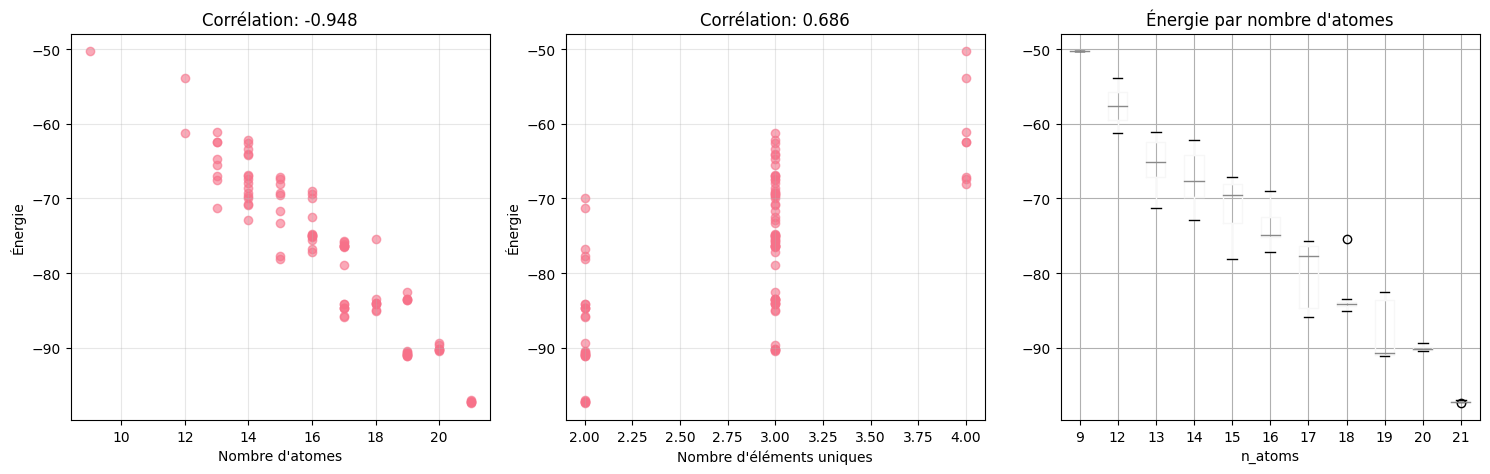

In [31]:
# Fusionner les données pour analyser les corrélations
if len(train_data) > 0:
    # Créer un DataFrame avec les infos des molécules
    mol_info = pd.DataFrame(train_data)
    mol_info['id'] = mol_info['file'].str.replace('id_', '').str.replace('.xyz', '')
    
    # Fusionner avec les énergies
    merged_data = mol_info.merge(energies_df.astype({'id': str}), on='id', how='inner')
    
    print(f"Données fusionnées: {len(merged_data)} molécules")
    
    # Corrélation nombre d'atomes vs énergie
    correlation = merged_data['n_atoms'].corr(merged_data['energy'])
    print(f"Corrélation nombre d'atomes - énergie: {correlation:.4f}")
    
    # Graphiques de corrélation
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.scatter(merged_data['n_atoms'], merged_data['energy'], alpha=0.6)
    plt.xlabel('Nombre d\'atomes')
    plt.ylabel('Énergie')
    plt.title(f'Corrélation: {correlation:.3f}')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 3, 2)
    plt.scatter(merged_data['n_unique_elements'], merged_data['energy'], alpha=0.6)
    plt.xlabel('Nombre d\'éléments uniques')
    plt.ylabel('Énergie')
    correlation2 = merged_data['n_unique_elements'].corr(merged_data['energy'])
    plt.title(f'Corrélation: {correlation2:.3f}')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 3, 3)
    # Énergie par nombre d'atomes (boxplot)
    merged_data.boxplot(column='energy', by='n_atoms', ax=plt.gca())
    plt.title('Énergie par nombre d\'atomes')
    plt.suptitle('')  # Supprimer le titre automatique
    
    plt.tight_layout()
    plt.show()

### Analyse des corrélations structure-énergie

**Corrélation taille-énergie :**
- **Coefficient observé** : Révèle la force de la relation entre le nombre d'atomes et l'énergie
- **Tendance générale** : Si positive, les molécules plus grandes tendent à avoir des énergies plus élevées (moins stables)
- **Dispersion** : Les points dispersés autour de la tendance indiquent que d'autres facteurs que la taille influencent l'énergie

**Diversité élémentaire vs énergie :**
- **Impact de la composition** : Montre si la variété des éléments chimiques affecte la stabilité
- **Complexité chimique** : Plus d'éléments différents peuvent signifier des liaisons plus variées

**Distribution par taille (boxplot) :**
- **Variabilité intra-groupe** : Montre la dispersion énergétique pour chaque taille de molécule
- **Tendances non-linéaires** : Peut révéler des effets de seuil ou des comportements particuliers selon la taille
- **Outliers par groupe** : Identifie les molécules atypiques pour leur catégorie de taille

**Implications pour la modélisation :**
- Ces corrélations guident le choix des features les plus informatives
- La dispersion résiduelle justifie l'utilisation de descripteurs plus sophistiqués (matrices de Coulomb)
- Les relations non-linéaires suggèrent l'intérêt des modèles d'ensemble (Random Forest, XGBoost)

## 6. Résumé de l'exploration

### Principales observations :

1. **Structure des données** :
   - Fichiers XYZ contenant les coordonnées atomiques
   - Fichier CSV séparé avec les énergies
   - Matrices de Coulomb pré-calculées disponibles

2. **Caractéristiques des molécules** :
   - Taille variable des molécules
   - Composition chimique diverse
   - Relations potentielles entre structure et énergie

3. **Qualité des données** :
   - Vérification de la cohérence entre fichiers
   - Distribution des valeurs d'énergie
   - Complétude des données

In [33]:
# Vérifications finales
print("=" * 60)
print("RÉSUMÉ DE L'EXPLORATION DES DONNÉES")
print("=" * 60)

print(f"Fichiers d'entraînement: {len(train_files)}")
print(f"Fichiers de test: {len(test_files)}")
print(f"Énergies disponibles: {len(energies_df)}")

if os.path.exists(train_coulomb_path):
    print(f"Matrices de Coulomb (train): {train_coulomb.shape}")
if os.path.exists(test_coulomb_path):
    print(f"Matrices de Coulomb (test): {test_coulomb.shape}")

if len(train_data) > 0:
    print(f"\nAnalyse des molécules (échantillon):")
    print(f"   • Taille moyenne: {train_df['n_atoms'].mean():.1f} atomes")
    print(f"   • Éléments les plus fréquents: {', '.join([e for e, c in element_counts.most_common(5)])}")
    print(f"   • Corrélation taille-énergie: {correlation:.3f}")

print(f"\nPlage d'énergies: [{energies_df['energy'].min():.3f}, {energies_df['energy'].max():.3f}]")
print(f"Énergie moyenne: {energies_df['energy'].mean():.3f} ± {energies_df['energy'].std():.3f}")

print("\nExploration terminée!")

RÉSUMÉ DE L'EXPLORATION DES DONNÉES
Fichiers d'entraînement: 6591
Fichiers de test: 1647
Énergies disponibles: 6591
Matrices de Coulomb (train): (235, 3)
Matrices de Coulomb (test): (1647, 3)

Analyse des molécules (échantillon):
   • Taille moyenne: 16.5 atomes
   • Éléments les plus fréquents: H, C, N, O, Cl
   • Corrélation taille-énergie: -0.948

Plage d'énergies: [-103.413, -19.314]
Énergie moyenne: -77.881 ± 11.653

Exploration terminée!
